In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_14m_tied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_tied.csv")
df_14m_untied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_tied.csv")
df_14m_ztied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv")
df_14m_zuntied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv")
df_162m_tied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv")
df_162m_ztied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv")
df_162m_untied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv")
df_162m_zuntied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv")
#14m *sqrt(128)
#14m *sqrt(768)

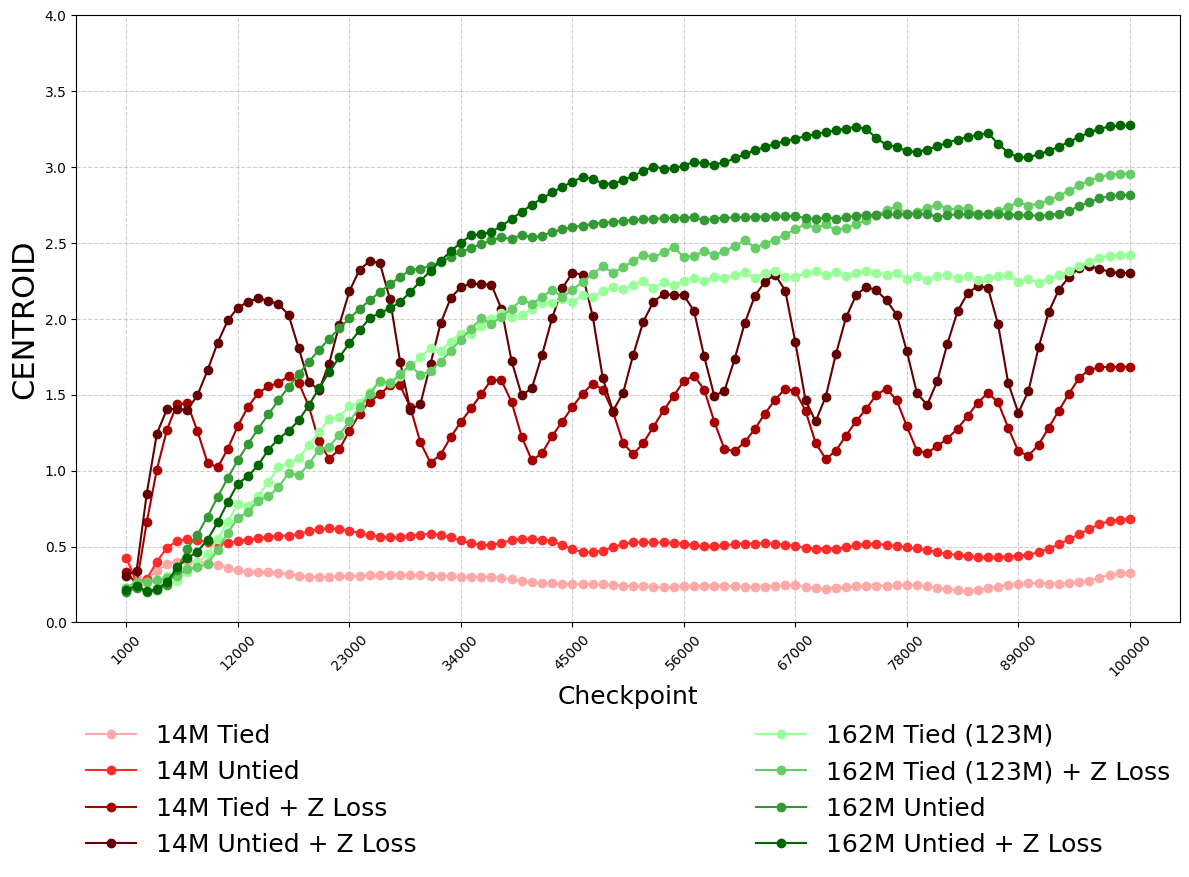

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 

# Load datasets
datasets = {
    '14M Tied':  pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_tied.csv"),
    '14M Untied':  pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_untied.csv"),
    "14M Tied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv"),
    "14M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv"),
    "162M Tied (123M)": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv"),
    "162M Tied (123M) + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv"),
    "162M Untied": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv"),
    "162M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv"),
}

# Columns to plot
columns_to_plot = ['Global Mean Bias']

# Define scaling factors
scale_factors = {
    "14M Tied": np.sqrt(1),
    "14M Untied": np.sqrt(1),
}

default_scale_factor = np.sqrt(1)  # Default for other datasets

# Define color gradients (red shades for first four, green shades for last four)
colors = ['#FFA8A8','#FF2C2C',  '#A60000', '#640000',  # Light to dark red
          '#99FF99', '#66CC66', '#339933', '#006600']  # Light to dark green

# Iterate over columns
for column in columns_to_plot:
    plt.figure(figsize=(12, 9))  # Widen plot, reduce height (3:4 ratio)
    
    # Iterate over datasets
    for (name, df), color in zip(datasets.items(), colors):
        df_scaled = df.copy()
        
        # Apply scaling factor
        scale_factor = scale_factors.get(name, default_scale_factor)
        df_scaled[column] *= scale_factor  

        plt.plot(df_scaled['Checkpoint'], df_scaled[column], 
                 marker='o', linestyle='-', color=color, markersize=6, label=name)
    
    # X-tick formatting
    indices = np.linspace(0, len(df_scaled) - 1, 10, dtype=int)  # 10 evenly spaced ticks
    xticks = df_scaled['Checkpoint'].iloc[indices].values  
    xticks_labels = [int(re.sub(r'\D', '', str(x))) for x in xticks]  
    
    plt.xticks(ticks=xticks, labels=xticks_labels, rotation=45)  

    # Labels and formatting
    plt.xlabel("Checkpoint", fontsize=18)
    plt.ylabel("CENTROID", fontsize=22)  # Corrected caption
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Adjust legend to fill width, keeping it compact
    plt.legend(bbox_to_anchor=(0, -0.15, 1, 0), loc='upper center',  
               prop={'size': 18}, borderaxespad=0., ncol=2, frameon=False, mode="expand")

    plt.ylim(0, 4)  # Y-axis limits
    plt.tight_layout()
    
    # Show the plot
    plt.show()



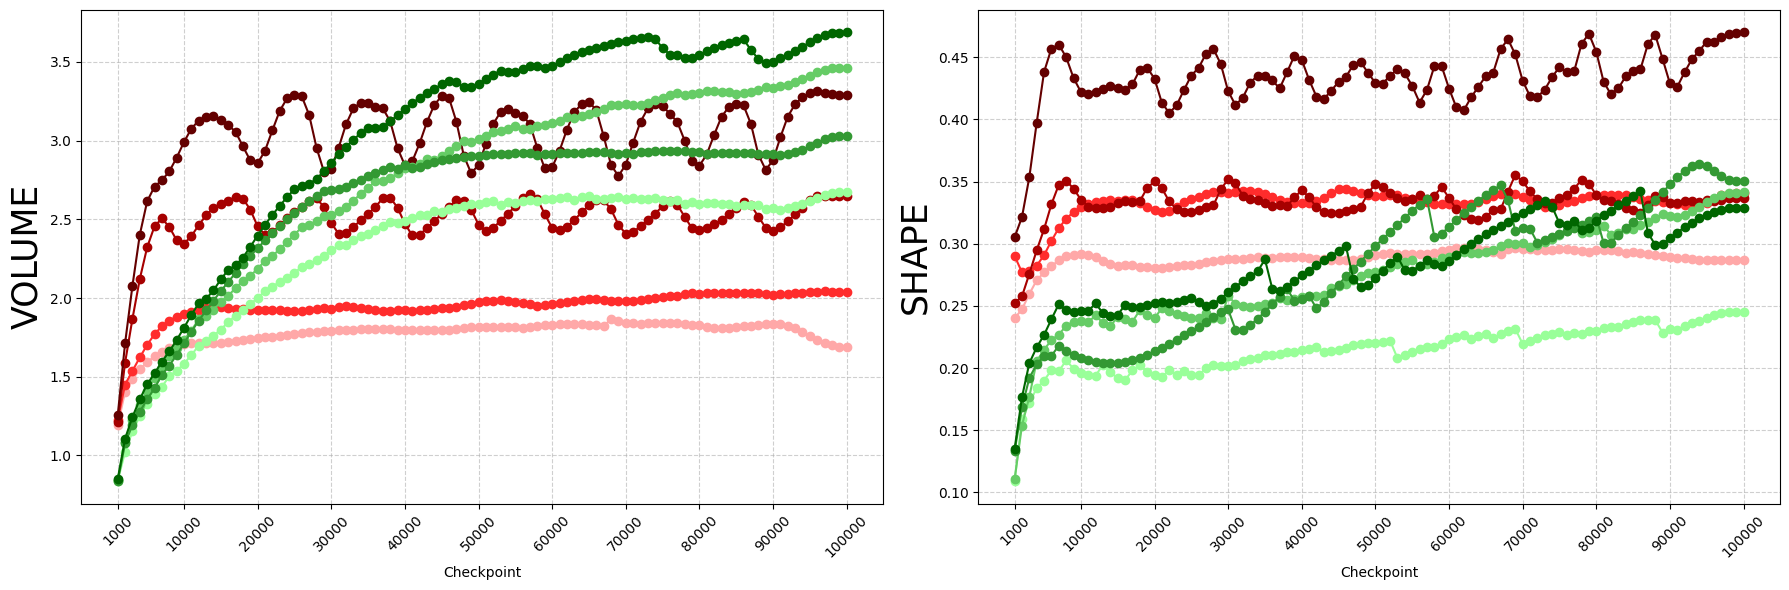

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 

# Load datasets
datasets = {
   '14M Tied':  pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_tied.csv"),
    '14M Untied':  pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_untied.csv"),
    "14M Tied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv"),
    "14M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv"),
    "162M Tied (123M)": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv"),
    "162M Tied (123M) + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv"),
    "162M Untied": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv"),
    "162M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv"),
}

# Columns to plot
columns_to_plot = ['Mean of RMS', 'Std of RMS']

# Define scaling factors
scale_factors = {
    "14M Tied": np.sqrt(128),
    "14M Untied": np.sqrt(128),
    "14M Tied + Z Loss": np.sqrt(128),
    "14M Untied + Z Loss": np.sqrt(128),
}

default_scale_factor = np.sqrt(768)  # For all other datasets
colors = ['#FFA8A8','#FF2C2C',  '#A60000', '#640000',  # Light to dark red
          '#99FF99', '#66CC66', '#339933', '#006600']  # Light to dark green


# Y-axis labels mapping
y_labels = {
    'Mean of RMS': 'VOLUME',
    'Std of RMS': 'SHAPE'
}

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(18, 6))

# Iterate over columns to plot them side by side
for idx, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, idx)  # Create subplot in 1 row, 2 columns (idx = 1 for first, 2 for second)
    
    # Iterate over datasets
    for (name, df), color in zip(datasets.items(), colors):
        df_scaled = df.copy()
        
        # Apply the correct scaling factor
        scale_factor = scale_factors.get(name, default_scale_factor)
        df_scaled[column] *= scale_factor  

        plt.plot(df_scaled['Checkpoint'], df_scaled[column], 
                 marker='o', linestyle='-', color=color, markersize=6, label=name)
    
    # Get indices where we want to display the x-tick labels
    indices = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
    xticks = df_scaled['Checkpoint'].iloc[indices].values  # Get Checkpoint values at those indices
    
    # Modify the x-tick labels to show only the integer part
    xticks_labels = [int(re.sub(r'\D', '', str(x))) for x in xticks]  # Remove non-digit characters
    
    plt.xticks(ticks=xticks, labels=xticks_labels, rotation=45)  # Apply custom tick labels

    # Labels and formatting
    plt.xlabel("Checkpoint")
    plt.ylabel(y_labels.get(column, column), fontsize=25)  # Use the mapped y-label
    plt.grid(True, linestyle="--", alpha=0.6)
# Show the plot with side-by-side subplots
plt.tight_layout()  # Adjust the spacing between the subplots
plt.show()



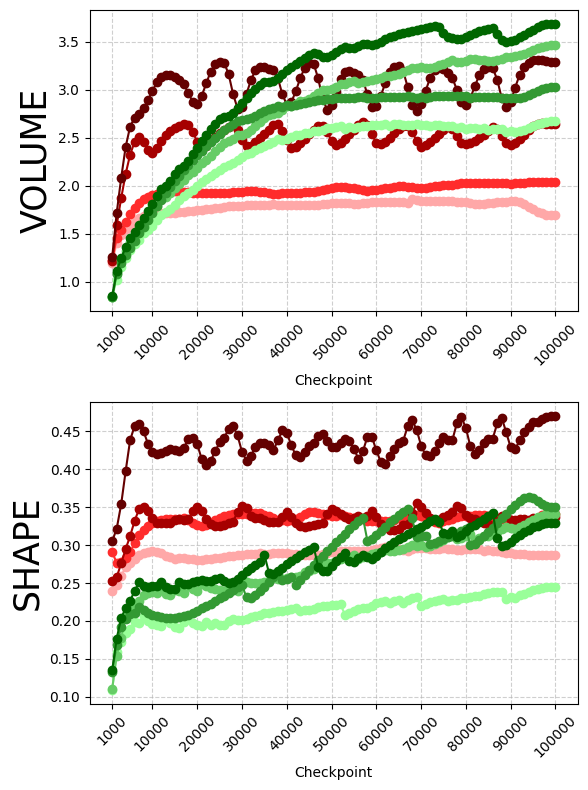

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 

# Load datasets
datasets = {
   '14M Tied':  pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_tied.csv"),
    '14M Untied':  pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_untied.csv"),
    "14M Tied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv"),
    "14M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv"),
    "162M Tied (123M)": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv"),
    "162M Tied (123M) + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv"),
    "162M Untied": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv"),
    "162M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv"),
}

# Columns to plot
columns_to_plot = ['Mean of RMS', 'Std of RMS']

# Define scaling factors
scale_factors = {
    "14M Tied": np.sqrt(128),
    "14M Untied": np.sqrt(128),
    "14M Tied + Z Loss": np.sqrt(128),
    "14M Untied + Z Loss": np.sqrt(128),
}

default_scale_factor = np.sqrt(768)  # For all other datasets
colors = ['#FFA8A8','#FF2C2C',  '#A60000', '#640000',  # Light to dark red
          '#99FF99', '#66CC66', '#339933', '#006600']  # Light to dark green


# Y-axis labels mapping
y_labels = {
    'Mean of RMS': 'VOLUME',
    'Std of RMS': 'SHAPE'
}


# Create a figure with 2 rows and 1 column (vertical stacking)
plt.figure(figsize=(6, 8))

# Iterate over columns to plot them one on top of the other
for idx, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 1, idx)  # Create subplot in 2 rows, 1 column (idx = 1 for first, 2 for second)
    
    # Iterate over datasets
    for (name, df), color in zip(datasets.items(), colors):
        df_scaled = df.copy()
        
        # Apply the correct scaling factor
        scale_factor = scale_factors.get(name, default_scale_factor)
        df_scaled[column] *= scale_factor  

        plt.plot(df_scaled['Checkpoint'], df_scaled[column], 
                 marker='o', linestyle='-', color=color, markersize=6, label=name)
    
    # Get indices where we want to display the x-tick labels
    indices = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
    xticks = df_scaled['Checkpoint'].iloc[indices].values  # Get Checkpoint values at those indices
    
    # Modify the x-tick labels to show only the integer part
    xticks_labels = [int(re.sub(r'\D', '', str(x))) for x in xticks]  # Remove non-digit characters
    
    plt.xticks(ticks=xticks, labels=xticks_labels, rotation=45)  # Apply custom tick labels

    # Labels and formatting
    plt.xlabel("Checkpoint")
    plt.ylabel(y_labels.get(column, column), fontsize=25)
    plt.grid(True, linestyle="--", alpha=0.6)

# Adjust the layout and save the figure as a PNG
plt.tight_layout()  # Adjust the spacing between the subplots
plt.show()


Earlier Figures – ignore

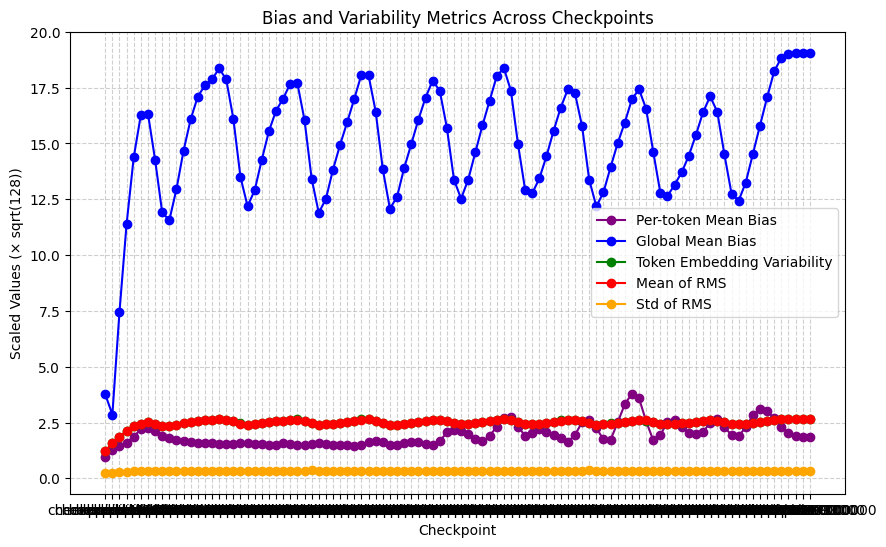

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Multiply relevant columns by sqrt(128)
scale_factor = np.sqrt(128)
df_scaled = df_14m_ztied.copy()
columns_to_scale = ['Per-token Mean Bias', 'Global Mean Bias', 'Token Embedding Variability', 'Mean of RMS', 'Std of RMS']
for col in columns_to_scale:
    df_scaled[col] *= scale_factor

# Define colors for each line
colors = ['purple', 'blue', 'green', 'red', 'orange']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each line with a unique color and markers
for col, color in zip(columns_to_scale, colors):
    plt.plot(df_scaled['Checkpoint'], df_scaled[col], 
             marker='o', linestyle='-', color=color, markersize=6, label=col)

# Labels and title
plt.xlabel("Checkpoint")
plt.ylabel("Scaled Values (× sqrt(128))")
plt.title("Bias and Variability Metrics Across Checkpoints")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show the plot
plt.show()


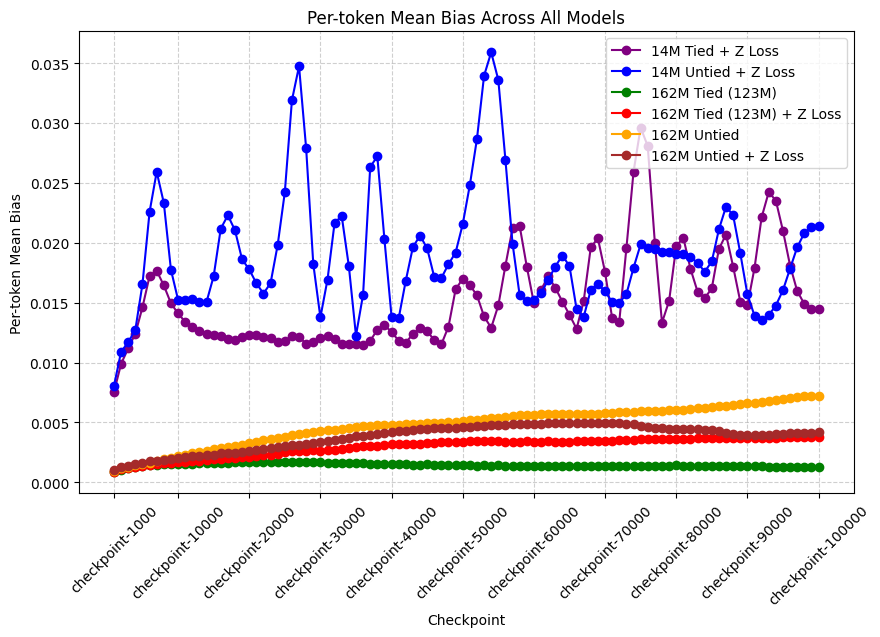

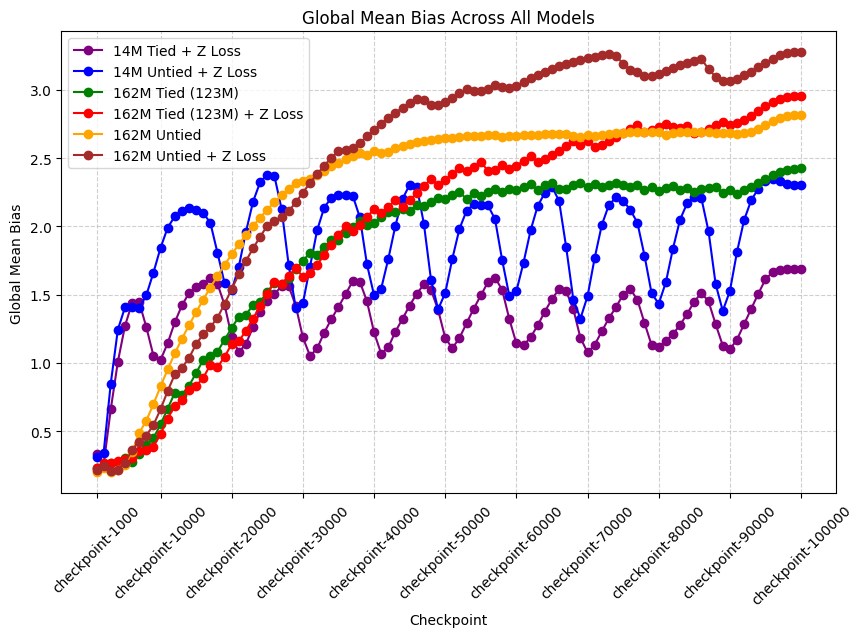

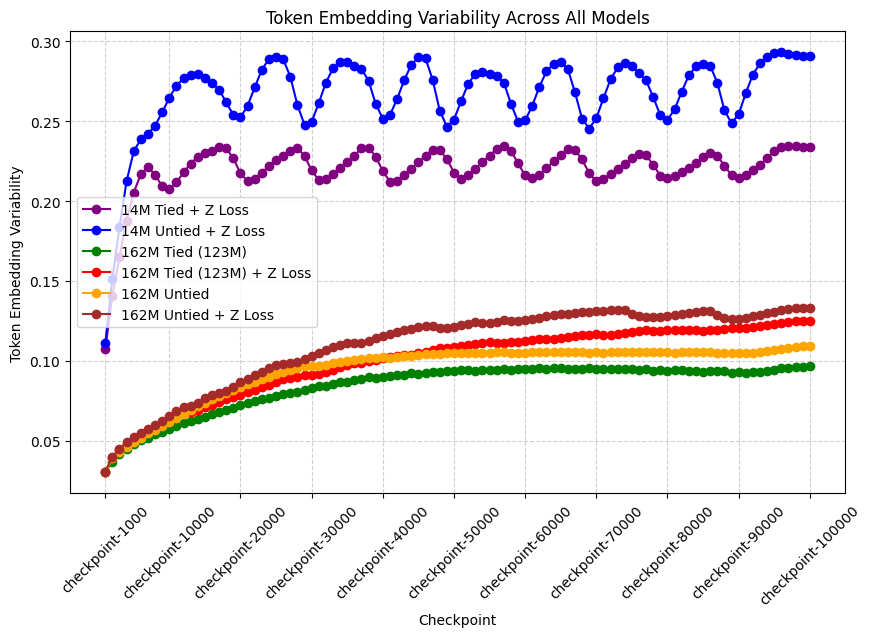

In [61]:
# Mean and Std RMS with Scaling Factors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
# Load datasets
datasets = {
    "14M Tied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv"),
    "14M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv"),
    "162M Tied (123M)": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv"),
    "162M Tied (123M) + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv"),
    "162M Untied": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv"),
    "162M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv"),
}

# Columns to plot
columns_to_plot = ['Per-token Mean Bias', 'Global Mean Bias', 'Token Embedding Variability']

# Define scaling factors
scale_factors = {
    "14M Tied": np.sqrt(1),
    "14M Untied": np.sqrt(1),
}

default_scale_factor = np.sqrt(1)  # For all other datasets

colors = ['purple', 'blue', 'green', 'red', 'orange', 'brown']  # Different colors for datasets

# Iterate over columns
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Iterate over datasets
    for (name, df), color in zip(datasets.items(), colors):
        df_scaled = df.copy()
        
        # Apply the correct scaling factor
        scale_factor = scale_factors.get(name, default_scale_factor)
        df_scaled[column] *= scale_factor  

        plt.plot(df_scaled['Checkpoint'], df_scaled[column], 
                 marker='o', linestyle='-', color=color, markersize=6, label=name)
    
    
    indices = [0, 9, 19, 29, 39, 49,59, 69, 79, 89,99]
    xticks = df_scaled['Checkpoint'].iloc[indices].values  # Get Checkpoint values at those indices
    plt.xticks(ticks=xticks, rotation=45)  # Rotate for readability


    # Labels and formatting
    plt.xlabel("Checkpoint")
    plt.ylabel(f"{column}")
    plt.title(f"{column} Across All Models")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    
    # Show the plot
    plt.show()


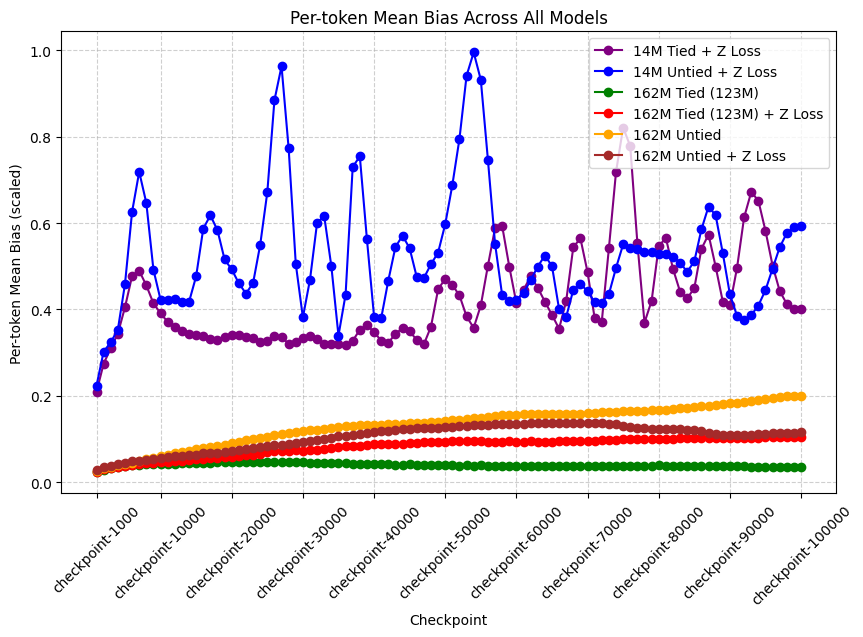

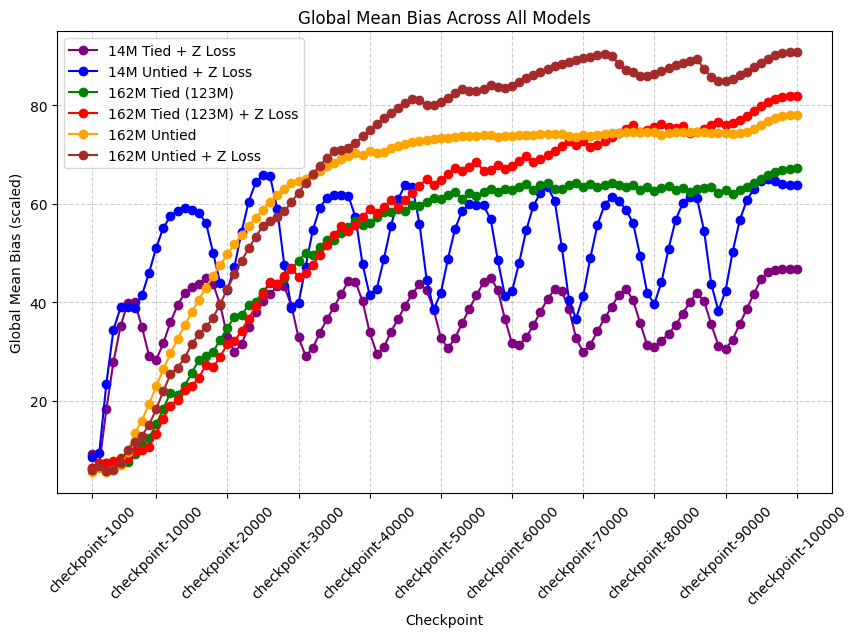

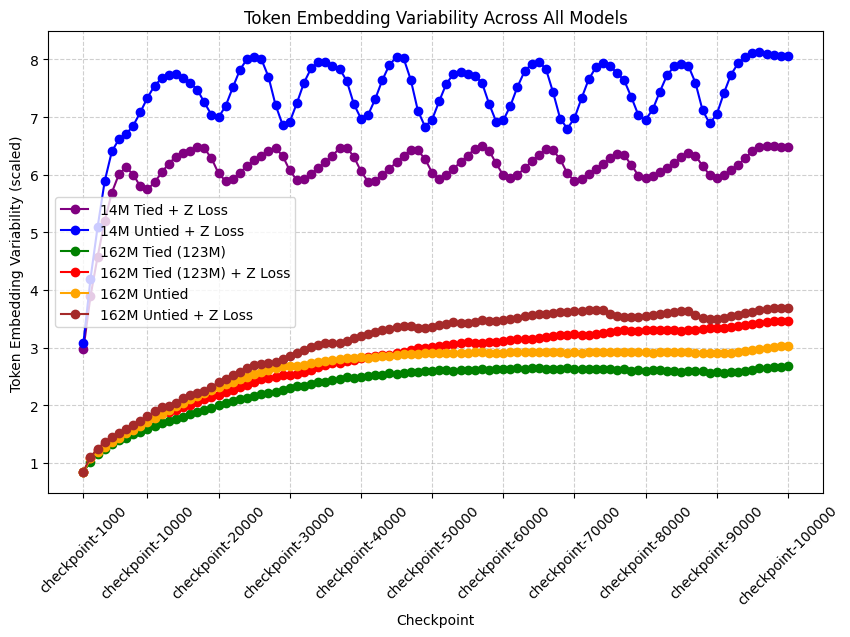

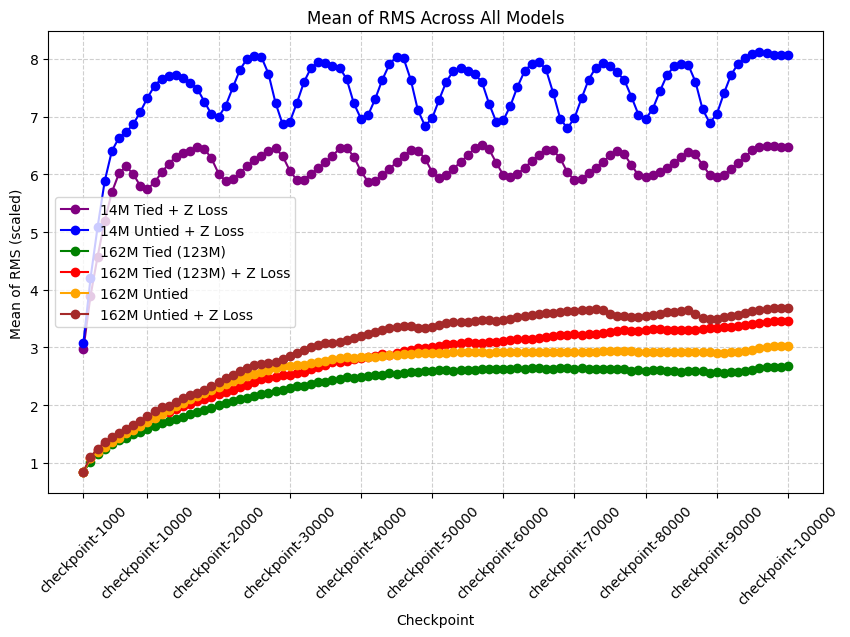

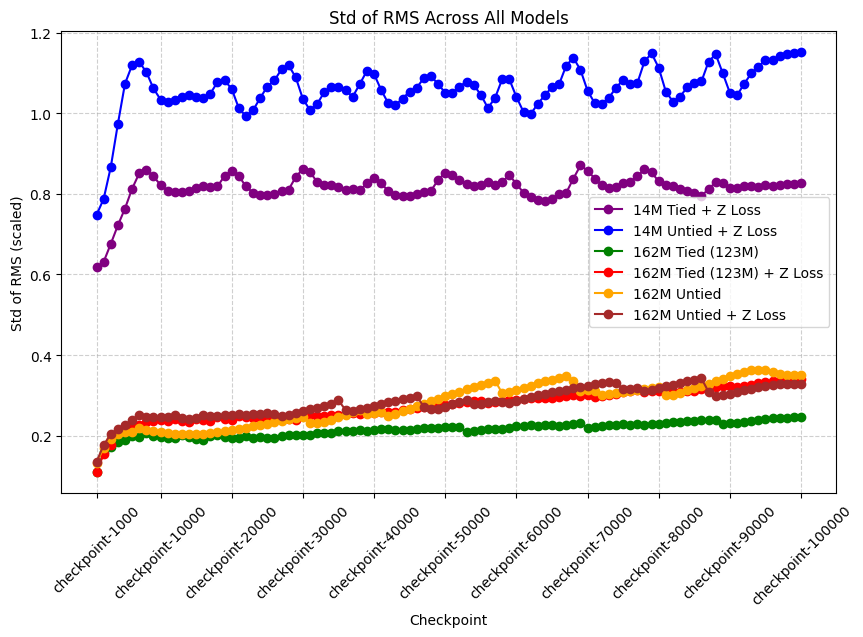

In [62]:
# Mean and Std RMS with Scaling Factors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
# Load datasets
datasets = {
    "14M Tied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv"),
    "14M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv"),
    "162M Tied (123M)": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv"),
    "162M Tied (123M) + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv"),
    "162M Untied": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv"),
    "162M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv"),
}

# Columns to plot
columns_to_plot = ['Per-token Mean Bias', 'Global Mean Bias', 'Token Embedding Variability', 'Mean of RMS', 'Std of RMS']

# Define scaling factors
scale_factors = {
    "14M Tied": np.sqrt(128),
    "14M Untied": np.sqrt(128),
}

default_scale_factor = np.sqrt(768)  # For all other datasets

colors = ['purple', 'blue', 'green', 'red', 'orange', 'brown']  # Different colors for datasets

# Iterate over columns
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Iterate over datasets
    for (name, df), color in zip(datasets.items(), colors):
        df_scaled = df.copy()
        
        # Apply the correct scaling factor
        scale_factor = scale_factors.get(name, default_scale_factor)
        df_scaled[column] *= scale_factor  

        plt.plot(df_scaled['Checkpoint'], df_scaled[column], 
                 marker='o', linestyle='-', color=color, markersize=6, label=name)
    
    
    indices = [0, 9, 19, 29, 39, 49,59, 69, 79, 89,99]
    xticks = df_scaled['Checkpoint'].iloc[indices].values  # Get Checkpoint values at those indices
    plt.xticks(ticks=xticks, rotation=45)  # Rotate for readability


    # Labels and formatting
    plt.xlabel("Checkpoint")
    plt.ylabel(f"{column} (scaled)")
    plt.title(f"{column} Across All Models")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    
    # Show the plot
    plt.show()

